# Assignment 5 Scrapping Data
### Kevin Williams 

# Imports 

In [39]:
import pandas as pd
from requests_html import HTMLSession
import os
import re
from time import sleep
from tqdm.notebook import tqdm # progress bar
from NEAR_regex import NEAR_regex 
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Disclamer !

In this assignment I am having an issue with updating the risk calculations to the rows. Take a look at my test section in measure_risk.ipynb, which has the same exact code and runs perfectly for another df. 

I was told that when I created the risk columns to use np.nan instead of 0, but either way the NEAR_regex search results are not being inputed into ccm_with_risk.

Moving forward, pay attention to my "style of coding" because for the most part I understand how to code this assignment. 

*The analysis folder will now use a static df i created to demonstrate my visualization and anlaysis skills*

#### Sticking to assignment 5 instructions if code worked 

In [ ]:
# # import risk df to conduct analysis on 
# risk_data = pd.read_stata('output/ccm_with_risk.dta')

# #explore the dataFrame 
# risk_data.head()

## Quick Setup
### *becuse ccm_with_risk didnt update correctly*

In [28]:
ccm = pd.read_stata('input/2007_inv_and_tech.dta')

# create 5 new risk variables
ccm_with_risk = ccm.assign(
    govt_risk1 = np.nan,
    govt_risk2 = np.nan,
    govt_risk3 = np.nan,
    currency_risk = np.nan,
    reputational_risk = np.nan,
)

In [29]:
def get_ccm_Filepath(row):
    '''
    Parameters
    ----------
    row: Pandas dataFrame indicating "row of passed" df
    
    Warning / Feature
    -------
    
    This function will only work for the ccm dataFrame beacause of "FName" and thus is not flexable 
    
    Returns
    -------
    This function returns text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened. If name of file is not found returns false.
    '''
    if row['FName'] != '': 
        form     = row['Form'].replace('/','').replace('\\','')  
        CoName   = row['CoName'].replace('/','')
        folder   =  f'edgar_filings/{CoName}/{form}/fyear_{int(row["fyear"])}/'
        filename = row['FName'].split('/')[-1] 
        filepath = folder + filename
        return filepath
    else: 
        return False



In [37]:
# testing parsing, searching risks, and updating a generated row df
data = {'govt_risk1':[0, 0, 0,0,0], 
        'govt_risk2':[0, 0, 0,0,0], 
        'govt_risk3':[0, 0, 0,0,0]} 
# data = {'CoName':['ABM INDUSTRIES INC /DE/',
#                   '',
#                   'ANALYSTS INTERNATIONAL CORP',
#                   '',
#                   'AUTODESK INC'], 
 
df = pd.DataFrame(data) 

print(df)
for index, row in tqdm(df.iterrows(),desc='Parsing and searching risks '):
    index              = ccm_with_risk.iloc[index]
    filepath           = get_ccm_Filepath(index)
    
    if filepath != False:
        company_filing = open(filepath, 'r') # open Company 10-K file txt
        lower          = BeautifulSoup(company_filing.read()).get_text().lower() # removes html tags and lower case everything 
        no_punc        = re.sub(r'\W',' ',lower) # remove punctuations (\w is word chars, \W is the opposite)
        cleaned        = re.sub(r'\s+',' ',no_punc).strip() # remove excess whitespace (\s is all whitespace)
        company_filing.close()
        
       # risk searches
        words = ['government','risk']
        rgx = NEAR_regex(words,max_words_between=100,partial=True)
        row['govt_risk1'] = len(re.findall(rgx,cleaned))
        
        # increased max_words_between
        words = ['government','risk']
        rgx = NEAR_regex(words,max_words_between=150,partial=True)
        row['govt_risk2'] = len(re.findall(rgx,cleaned))
        
        # changed number of words  
        words = ['government','negatively','risk']
        rgx = NEAR_regex(words,max_words_sbetween=200,partial=True)
        row['govt_risk3'] = len(re.findall(rgx,cleaned))
        
    else:
        #go to next row in df 
        continue

company_name =pd.DataFrame(['ABM INDUSTRIES INC /DE/','','ANALYSTS INTERNATIONAL CORP','','AUTODESK INC'])
df.insert(0, 'CoName', company_name)
df


   govt_risk1  govt_risk2  govt_risk3
0           0           0           0
1           0           0           0
2           0           0           0
3           0           0           0
4           0           0           0


,CoName,govt_risk1,govt_risk2,govt_risk3
0,ABM INDUSTRIES INC /DE/,1,2,0
1,,0,0,0
2,ANALYSTS INTERNATIONAL CORP,1,1,0
3,,0,0,0
4,AUTODESK INC,2,2,2


# Plots

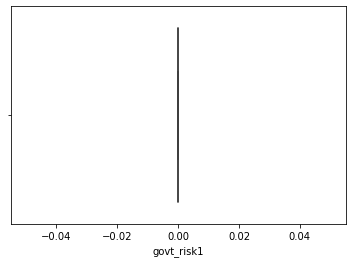

In [40]:
plt.style.use('bmh')
sns.boxplot(data = df, x='govt_risk1')
plt.title("Government Risk Mesure 1 Acros")
plt.xlabel('Year')
plt.ylabel('Average Leverage')
plt.ylim(0,0.65)

In [ ]:
sns.catplot(x="sex", y=columns.count(), hue="class", kind="bar", data=titanic);


# Analysis

#### Explore the correlation between 2008 investment (CAPX and R&D) and 2007 technology.
